In [1]:
import pandas as pd

In [2]:
data_result = pd.read_csv('results.csv')

In [32]:
shootout_data = pd.read_csv('shootouts.csv')

In [43]:
goalscorers = pd.read_csv('goalscorers.csv')

In [3]:
data_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data_result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [10]:
data_result.info

<bound method DataFrame.info of              date home_team    away_team  home_score  away_score  \
0      1872-11-30  Scotland      England           0           0   
1      1873-03-08   England     Scotland           4           2   
2      1874-03-07  Scotland      England           2           1   
3      1875-03-06   England     Scotland           2           2   
4      1876-03-04  Scotland      England           3           0   
...           ...       ...          ...         ...         ...   
45310  2023-11-21     Wales       Turkey           1           1   
45311  2023-11-21   Croatia      Armenia           1           0   
45312  2023-11-21   Andorra       Israel           0           2   
45313  2023-11-21    Kosovo      Belarus           0           1   
45314  2023-11-21   Romania  Switzerland           1           0   

                    tournament              city   country  neutral  
0                     Friendly           Glasgow  Scotland    False  
1          

In [11]:
data_result.describe()

,home_score,away_score
count,45315.000000,45315.000000
mean,1.739314,1.178241
std,1.746904,1.392095
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

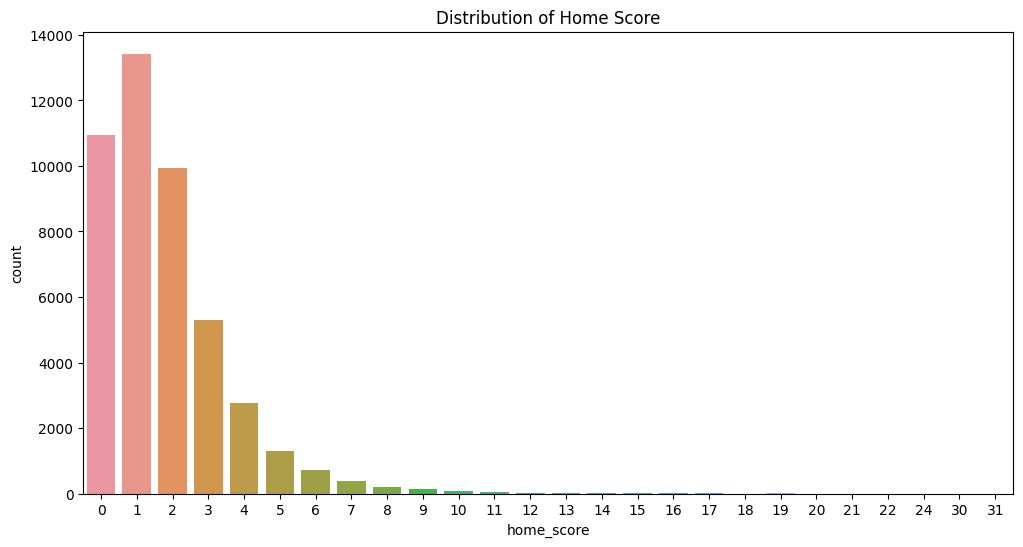

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='home_score',data=data_result)
plt.title('Distribution of Home Score')
plt.show()

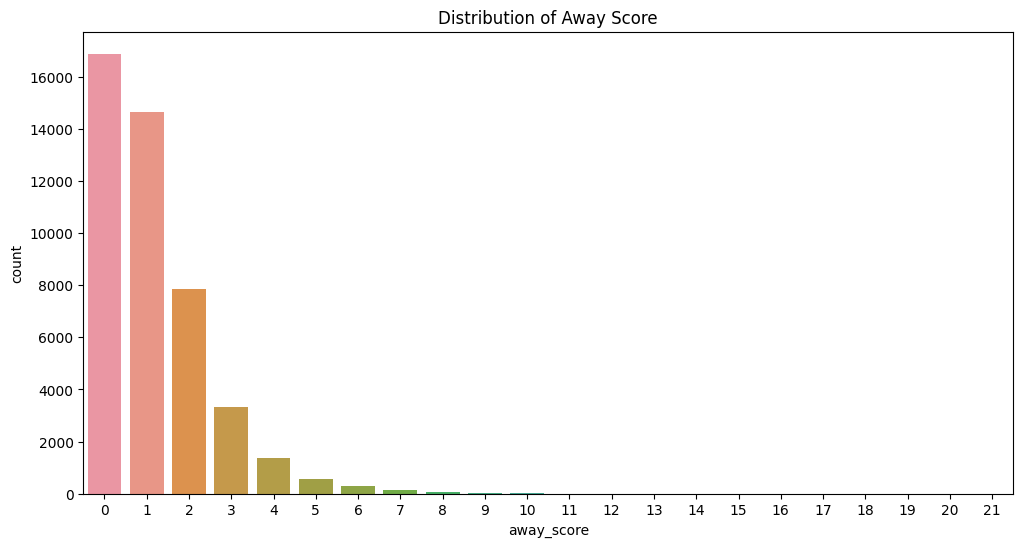

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='away_score',data=data_result)
plt.title('Distribution of Away Score')
plt.show()

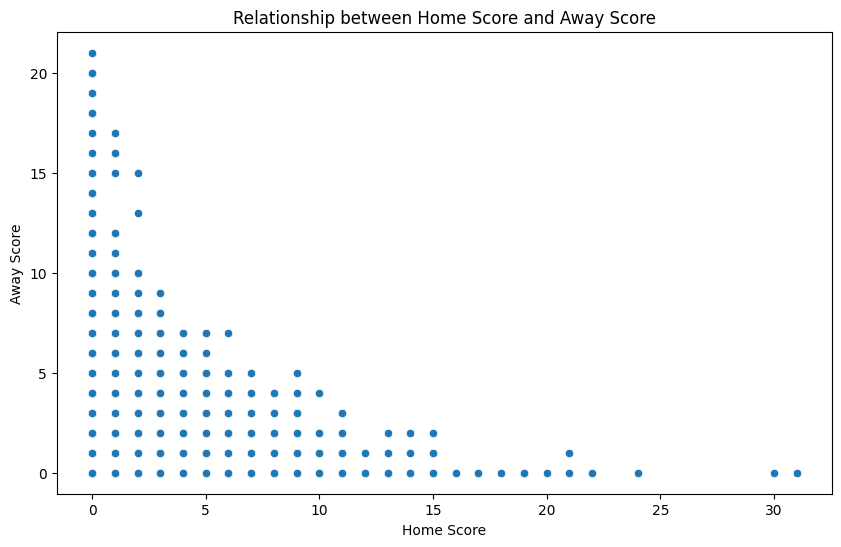

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='home_score', y='away_score', data=data_result)
plt.title('Relationship between Home Score and Away Score')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.show()

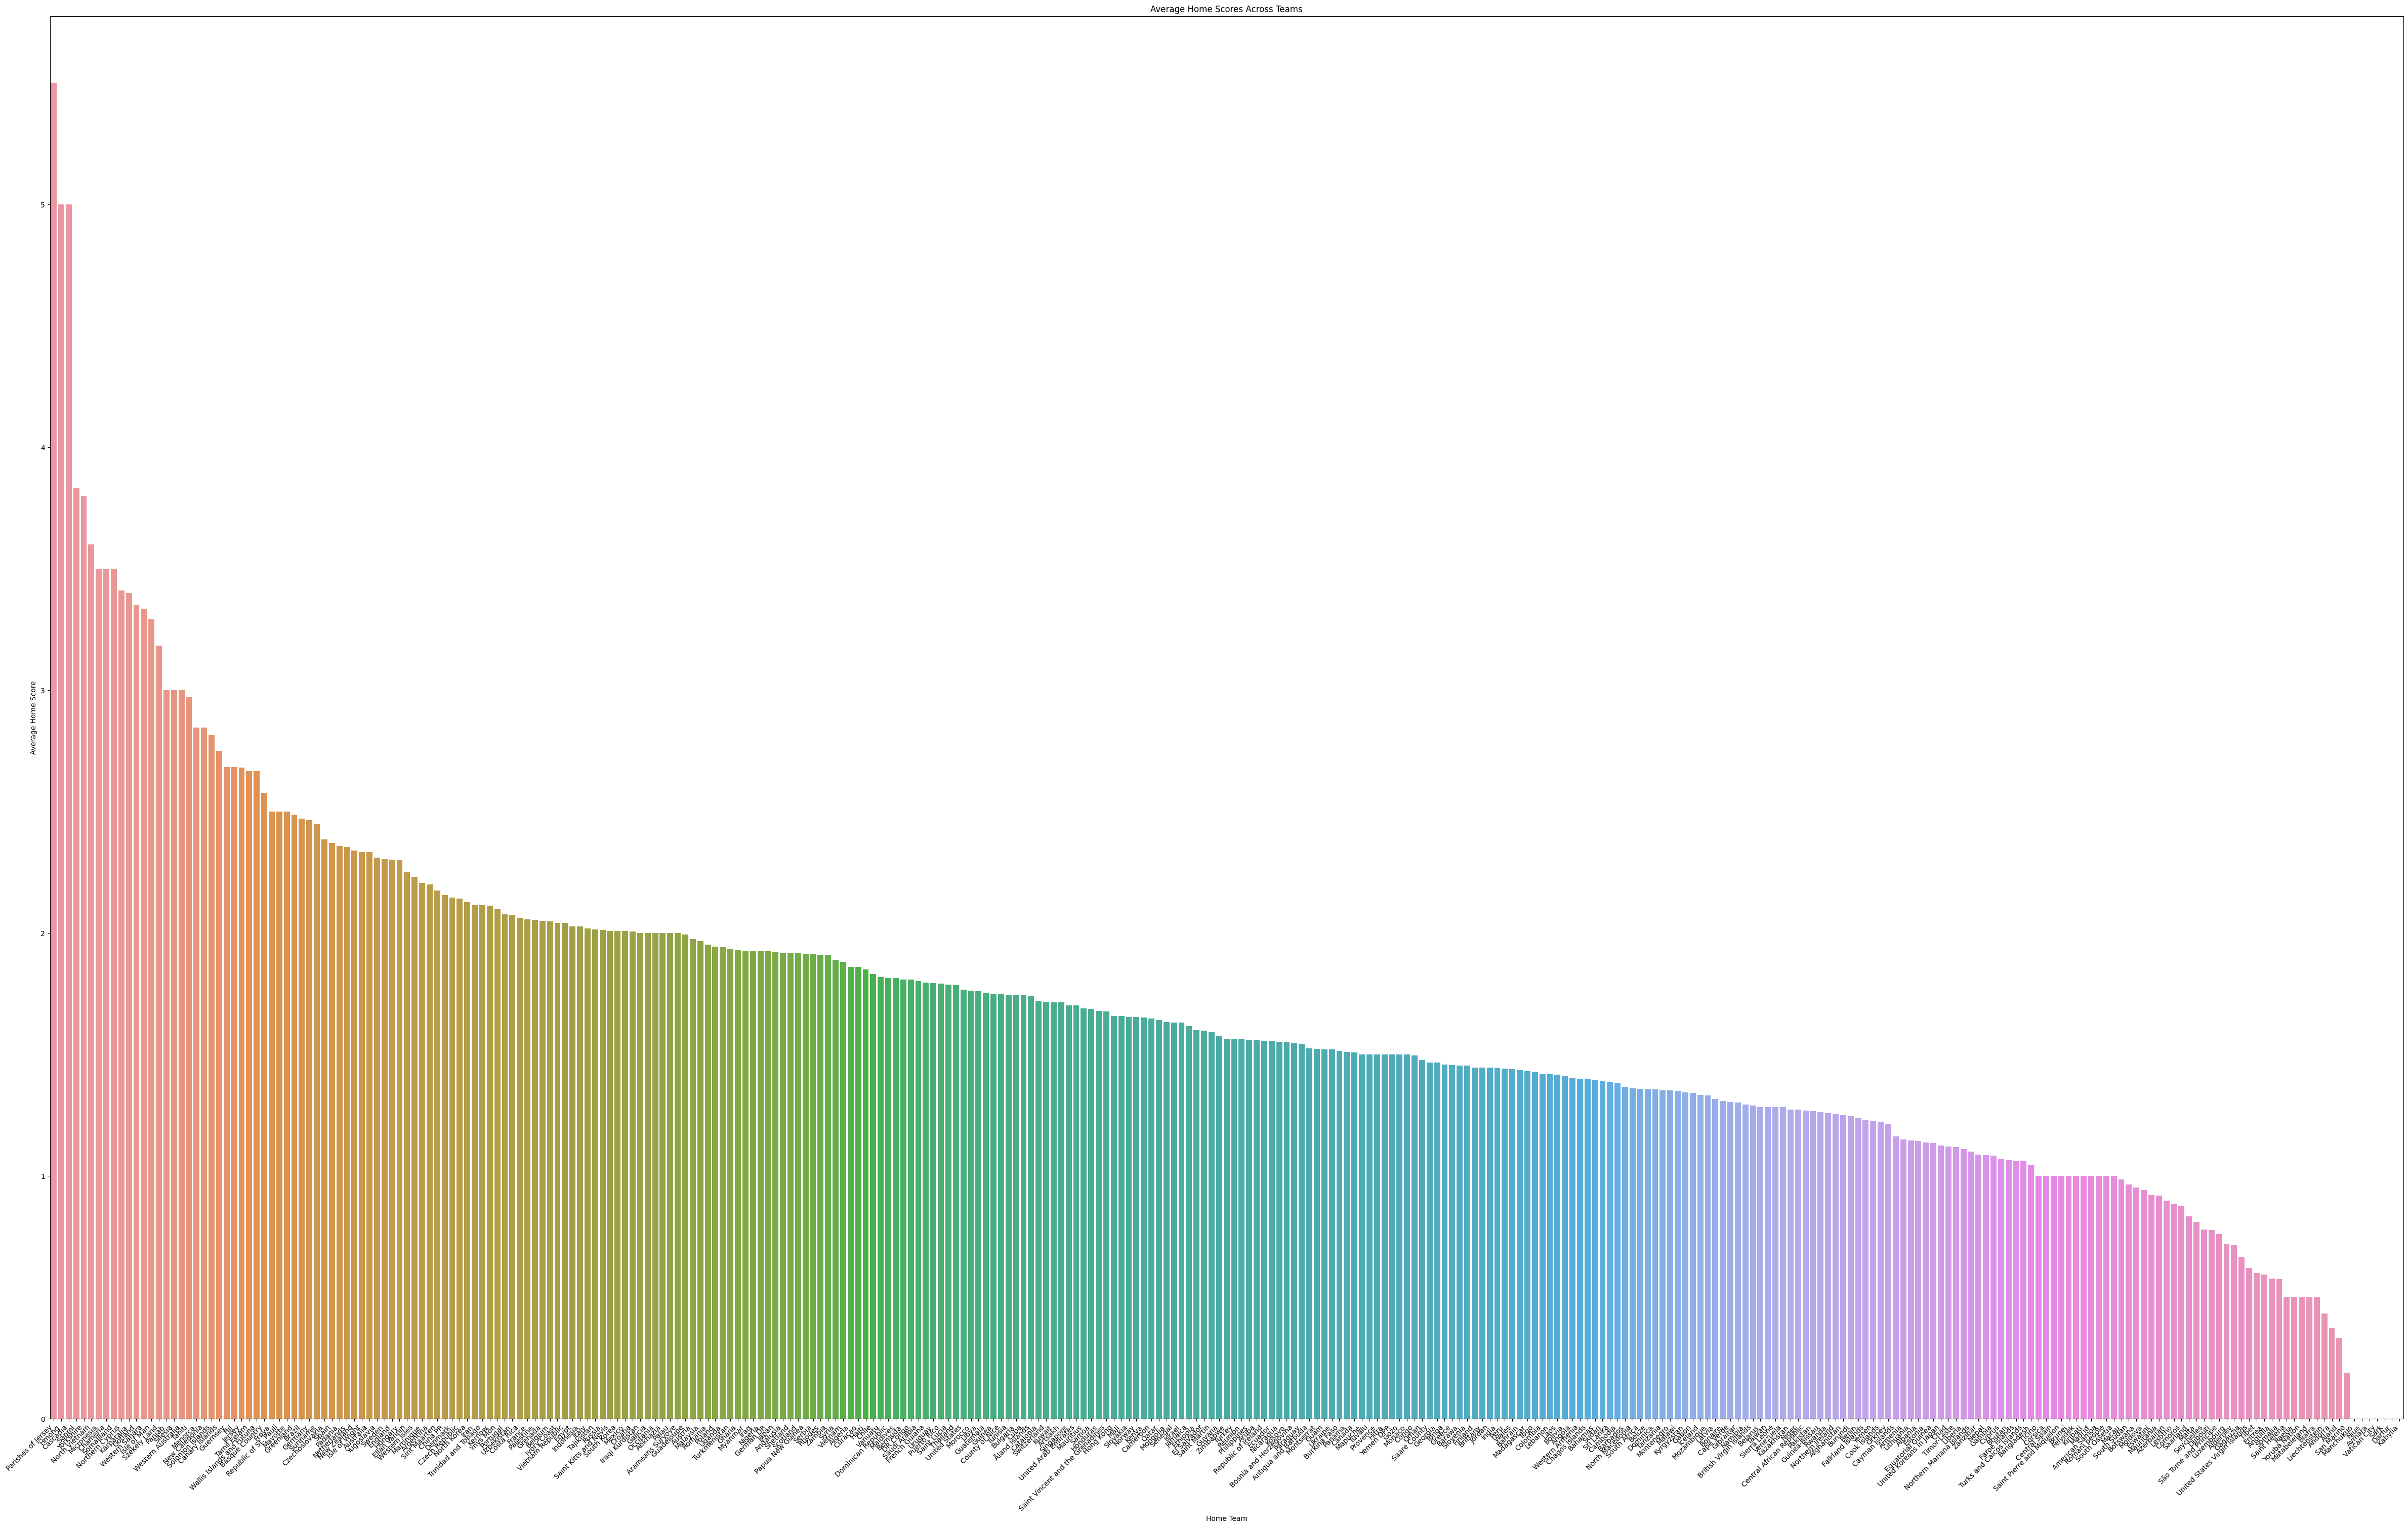

In [30]:
# Calculate average home scores for each team
average_home_scores = data_result.groupby('home_team')['home_score'].mean().reset_index()

# Sort teams by average home score
sorted_teams = average_home_scores.sort_values(by='home_score', ascending=False)

# Plot bar chart
plt.figure(figsize=(60,36))
sns.barplot(x='home_team', y='home_score', data=sorted_teams)
plt.title('Average Home Scores Across Teams')
plt.xlabel('Home Team')
plt.ylabel('Average Home Score')
plt.xticks(rotation=45, ha='right')
plt.show()


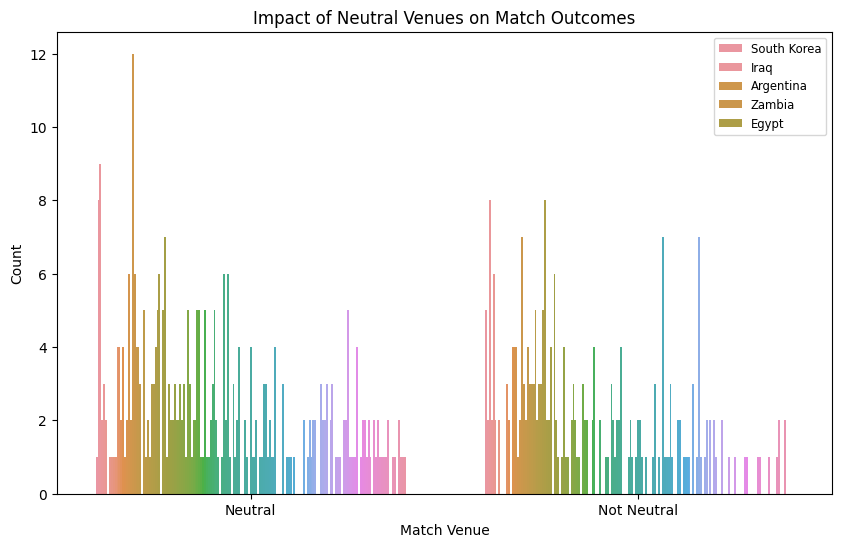

In [35]:
# Plot the count of match outcomes for neutral and non-neutral venues
plt.figure(figsize=(10, 6))
sns.countplot(x='neutral_match', hue='winner', data=merged_data)
plt.title('Impact of Neutral Venues on Match Outcomes')
plt.xlabel('Match Venue')
plt.ylabel('Count')

# Get the top N winners (adjust N based on your preference)
top_winners = merged_data['winner'].value_counts().head(5).index

# Filter the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
filtered_handles = [handles[i] for i, label in enumerate(labels) if label in top_winners]
filtered_labels = [label for label in labels if label in top_winners]

# Adjust the legend size with the filtered handles and labels
plt.legend(filtered_handles, filtered_labels, fontsize='small')

plt.show()


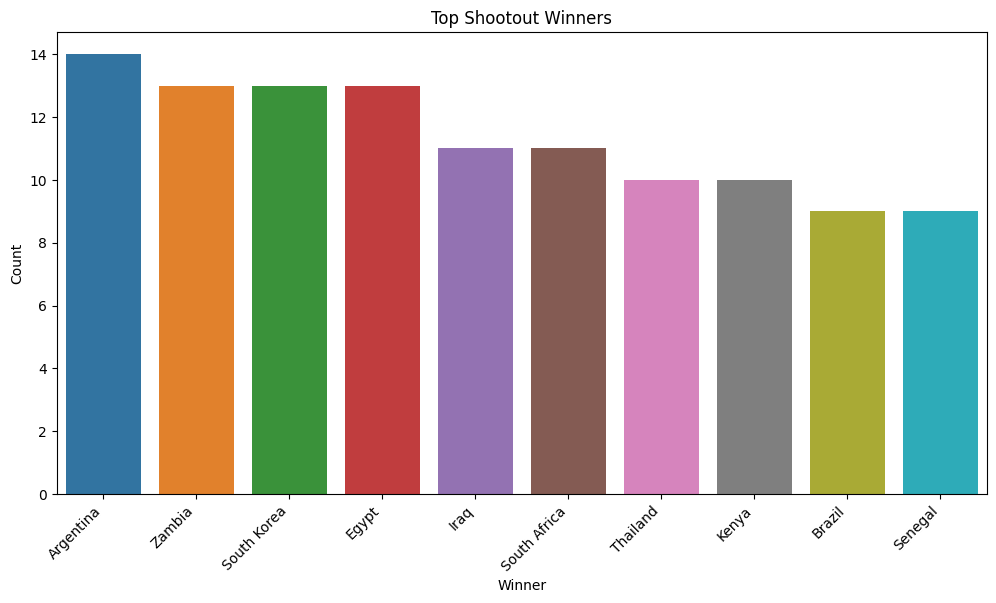

In [48]:
top_winners = shootout_data['winner'].value_counts().nlargest(10)  # Adjust the number as needed

plt.figure(figsize=(12, 6))
sns.barplot(x=top_winners.index, y=top_winners.values)
plt.title('Top Shootout Winners')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


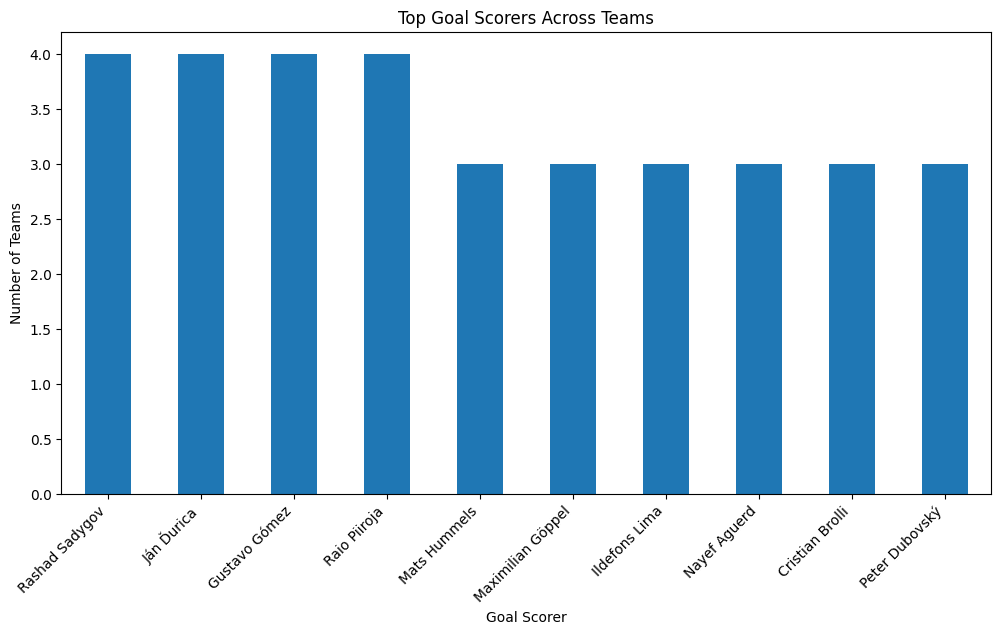

In [45]:
top_scorers = goalscorers.groupby('scorer')['team'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_scorers.plot(kind='bar')
plt.title('Top Goal Scorers Across Teams')
plt.xlabel('Goal Scorer')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45, ha='right')
plt.show()


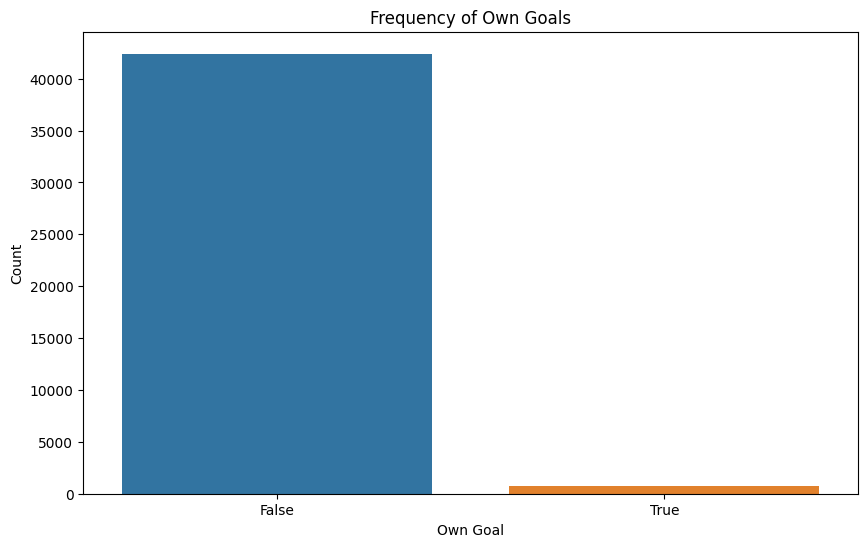

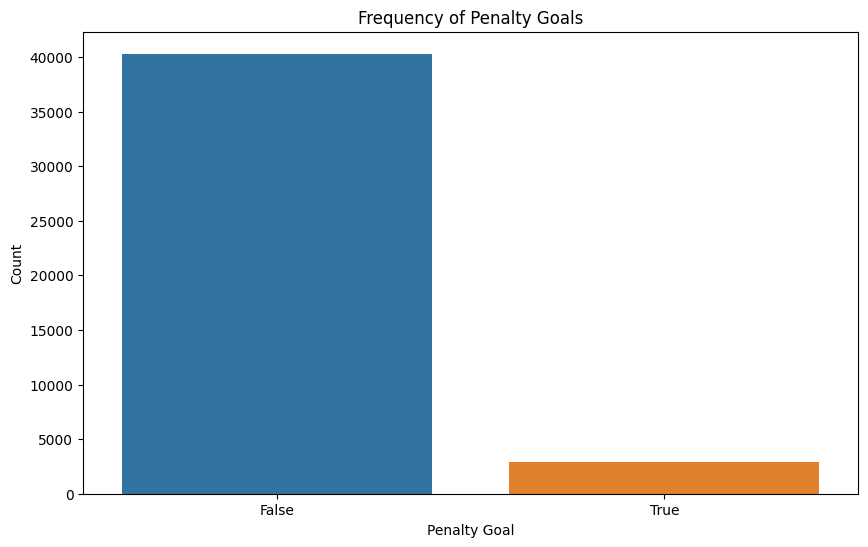

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='own_goal', data=goalscorers)
plt.title('Frequency of Own Goals')
plt.xlabel('Own Goal')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='penalty', data=goalscorers)
plt.title('Frequency of Penalty Goals')
plt.xlabel('Penalty Goal')
plt.ylabel('Count')
plt.show()


In [49]:
data_result.isnull().sum()

date             0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
neutral_match    0
dtype: int64

In [50]:
shootout_data.isnull().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    476
dtype: int64

In [51]:
goalscorers.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       260
own_goal       2
penalty        2
dtype: int64

In [52]:
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
# Assuming 'results' is your results dataset
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year

# Frequency of matches over time
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=results)
plt.title('Frequency of Matches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

# Trends in match outcomes over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='outcome', data=results)
plt.title('Match Outcomes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.legend(title='Outcome')
plt.show()
